<a href="https://colab.research.google.com/github/Koundinyalanka/habermancancersurvival/blob/master/HabermanCancerSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haberman Cancer Survival Dataset

The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Objective:** The objective of the assignment is to predict if the patient has survived the cancer treatment after 5 years based on the given attributes.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
url='https://raw.githubusercontent.com/Koundinyalanka/habermancancersurvival/master/haberman.csv'
hab=pd.read_csv(url)
hab.columns=['age','year','nodes','status']
print(hab.head())
print(hab.shape)

   age  year  nodes  status
0   30    62      3       1
1   30    65      0       1
2   31    59      2       1
3   31    65      4       1
4   33    58     10       1
(305, 4)


**Observations**

* There are 305 datapoints in this dataset along with 4 attributes

* The attributes are as follows:
> 1. Age: The age of the patient in years
> 2. Year: The year of operation from 1900
> 3. nodes: Number of nodes which contain cancer
> 4. status: Class attribute  1 = the patient survived 5 years or longer 2 = the patient died within 5 year







In [0]:
#replace the status values for clarity
hab['status'].replace(1,'survived',inplace=True)
hab['status'].replace(2,'not survived',inplace=True)
print(hab['status'].value_counts())
print('\nThe high level stats')
#print all high level stats of the dataset
print(hab.describe())

survived        224
not survived     81
Name: status, dtype: int64

The high level stats
              age        year       nodes
count  305.000000  305.000000  305.000000
mean    52.531148   62.849180    4.036066
std     10.744024    3.254078    7.199370
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     61.000000   66.000000    4.000000
max     83.000000   69.000000   52.000000


**Observations**

* As the number of datapoints for survived and not survived are not equal this is an unbalanced dataset.
* The mean age of patients undergoing treatment is 52 with standard deviation of 10 years.
* The minimum age is 30 and maximum age is 83.
* The average number of cancer nodes in a patient is 4 with a standard deviation of 7.
* The minimum number of cancer nodes in a patient is 0 and maximum number is 52.

**Higher level analysis of survived data**

In [0]:
#seperate survived data
hab_survived=hab[hab['status']=='survived']
print(hab_survived.describe())
print('Age percentiles of patients who survived')
print(np.percentile(hab_survived['age'],[90,95,99]))
print('node percentiles of patients who survived')
print(np.percentile(hab_survived['nodes'],[90,95,99]))
print('node percentiles of patients who survived')
print(np.percentile(hab_survived['year'],[90,95,99]))
print('Median Absolute Deviation for age')
print(robust.mad(hab_survived['age']))
print('Median Absolute Deviation for nodes')
print(robust.mad(hab_survived['nodes']))



              age        year       nodes
count  224.000000  224.000000  224.000000
mean    52.116071   62.857143    2.799107
std     10.937446    3.229231    5.882237
min     30.000000   58.000000    0.000000
25%     43.000000   60.000000    0.000000
50%     52.000000   63.000000    0.000000
75%     60.000000   66.000000    3.000000
max     77.000000   69.000000   46.000000
Age percentiles of patients who survived
[67.   70.   74.77]
node percentiles of patients who survived
[ 8.   14.   27.31]
node percentiles of patients who survived
[67. 68. 69.]
Median Absolute Deviation for age
13.343419966550417
Median Absolute Deviation for nodes
0.0


**Observations**
* The average age of patients who survived the treatment is 52 (same as median) with standard deviation of 11. The minimum age is 30 and maximum age is 77. Median absolute deviation is 13
* 75 percent of people who survived the treatment has age below 60.
* The patients above the age of 77 did not survive the treatment. 
* The average number of cancer nodes in a patient is around 2 with standard deviation of 5. The minimum number of nodes is 0 and maximum number is 46.
* About 50 percent of people who survived the treatment have 0 nodes. (median) and median absolute deviation is 0
* About 75 percent of people who survived the treatment have nodes below 3. 


**Higher level analysis of not survived data**

In [0]:
#seperate survived data
hab_not=hab[hab['status']=='not survived']
print(hab_not.describe())
print('Age percentiles of patients who did not survive')
print(np.percentile(hab_not['age'],[90,95,99]))
print('node percentiles of patients who did not survive')
print(np.percentile(hab_not['nodes'],[90,95,99]))
print('node percentiles of patients who did not survive')
print(np.percentile(hab_not['year'],[90,95,99]))
print('Median Absolute Deviation for age')
print(robust.mad(hab_not['age']))
print('Median Absolute Deviation for nodes')
print(robust.mad(hab_not['nodes']))

             age       year      nodes
count  81.000000  81.000000  81.000000
mean   53.679012  62.827160   7.456790
std    10.167137   3.342118   9.185654
min    34.000000  58.000000   0.000000
25%    46.000000  59.000000   1.000000
50%    53.000000  63.000000   4.000000
75%    61.000000  65.000000  11.000000
max    83.000000  69.000000  52.000000
Age percentiles of patients who did not survive
[67. 70. 79.]
node percentiles of patients who did not survive
[20.  23.  38.4]
node percentiles of patients who did not survive
[67. 68. 69.]
Median Absolute Deviation for age
11.860817748044816
Median Absolute Deviation for nodes
5.930408874022408


**Observations**
* The average age of people who did not survive is 53 with standard deviation of 10 and MAD of 11 which is almost similar to people who survived.
* 75 percent of people who did not survive have age below 61.
* Patients with age below 34 survived the treatment.
* The average number of cancer nodes is 7 with standard deviation of 9 and median is 4 with MAD of 5 which are higher than that of people who survived.

**Key Observations from both the classes**
* The average age of people who survived and died is almost the same (which might imply that age has little effect on outcome) but patients with age below 34 survived the treatment and patients with age above 77 did not survive. We can observe that lower the age , higher are the chances of survival.

* The average and median of nodes for people who survived is less than that of people who did not survive which implies that lower the nodes, higher the chances of survival.

* Year did not play any prominent role in classifying the patients.

# Bivariate Analysis

**Pair Plot**

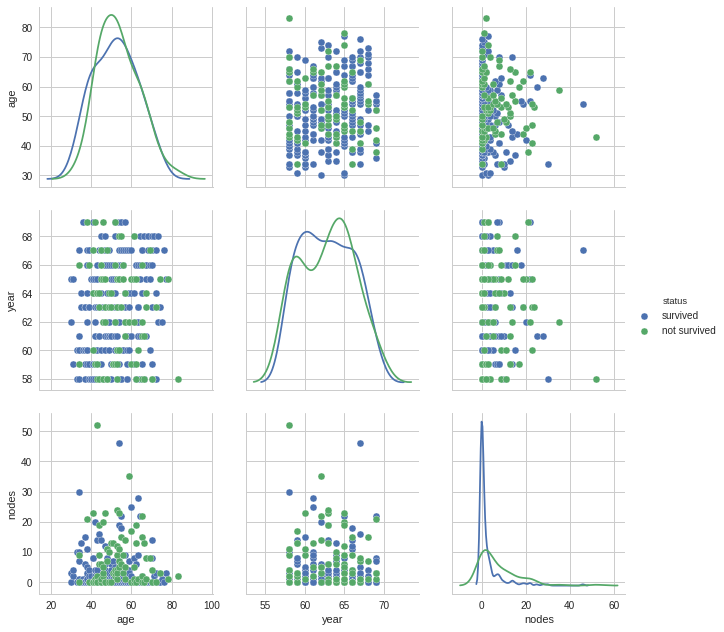

In [0]:
sns.set_style('whitegrid')
sns.pairplot(hab,hue='status',size=3,diag_kind='kde')
plt.show()

**Observations**
* There is no clear boundary between the patients who survived and died but graph with nodes and age tends to seperate the points better.
* We can conclude that age and number of nodes are the useful properties to classify the data.

**2D Scatter Plot**

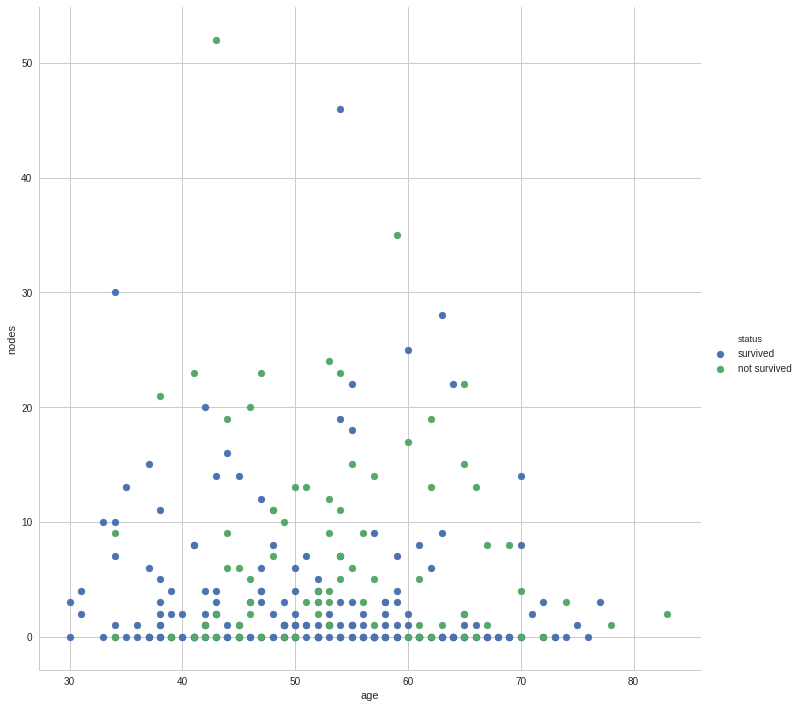

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(hab,hue='status',size=10).map(plt.scatter,'age','nodes').add_legend();
plt.show();

**Observations**
* Most of the people who have lower age and lower nodes tend to survive.
* Most of people with age of 30-40 have survived the treatment.
* Most of people with nodes from 0 to 3 have survived the treatment. The number of people who died gradually increased as the number of nodes increases.

# **Uni Variate Analysis**

**Histograms**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


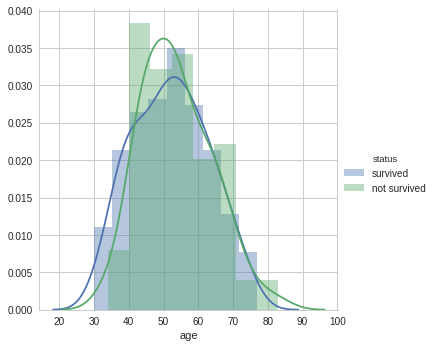

In [0]:
#for age
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

**Observations**
* People with age less than 40 have better chances of survival
* Most people died are having age between 40-60

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


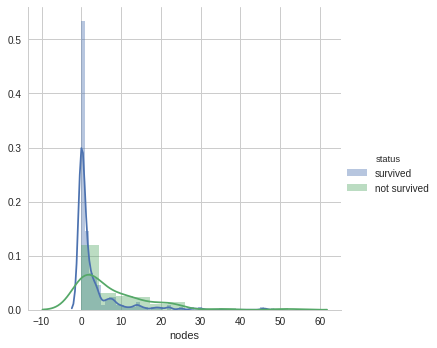

In [0]:
#for nodes
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

**Observations**
* People with 0 nodes have better chance of survival.
* Number of people survived drastically dropped for nodes greater than 1.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


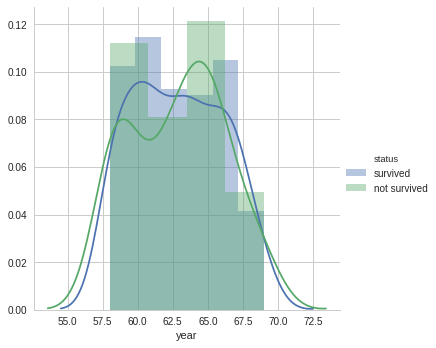

In [0]:
#for year
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

**Observations**
* The histograms are highly overlapping each other so year does not play any significant role.

**Probability Density Function and Cumulative Distribution Function** 

For Survived Data

PDF:  [0.15625    0.21875    0.33035714 0.20535714 0.08928571]
[30.  39.4 48.8 58.2 67.6 77. ]


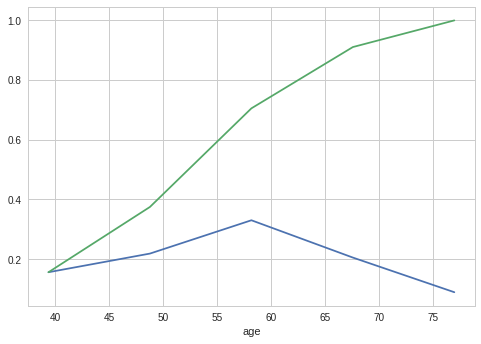

PDF:  [0.91517857 0.04910714 0.02232143 0.00892857 0.00446429]
[ 0.   9.2 18.4 27.6 36.8 46. ]


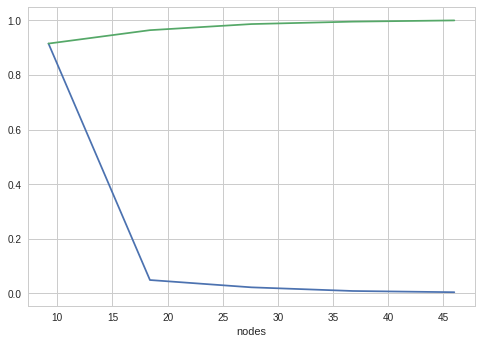

In [0]:
#for age
counts,bin_edges=np.histogram(hab_survived['age'],bins=5,density=True)
pdf=counts/(sum(counts))
print('PDF: ',pdf)
print(bin_edges)
#for cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.show()


#for nodes
counts,bin_edges=np.histogram(hab_survived['nodes'],bins=5,density=True)
pdf=counts/(sum(counts))
print('PDF: ',pdf)
print(bin_edges)
#for cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.show()

**Observations**
* About 92 percent of people who survived have nodes below 10.
* About 75 percent of people who survived have age below 60.

For Not Survived Data

PDF:  [0.16049383 0.39506173 0.25925926 0.14814815 0.03703704]
[34.  43.8 53.6 63.4 73.2 83. ]


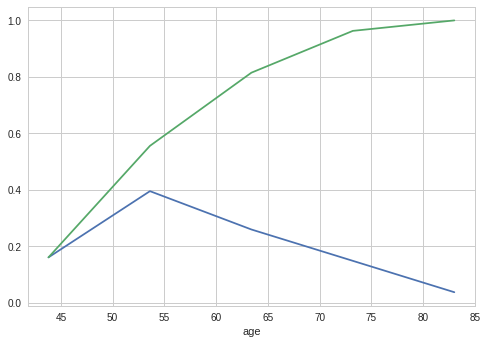

PDF:  [0.71604938 0.18518519 0.07407407 0.01234568 0.01234568]
[ 0.  10.4 20.8 31.2 41.6 52. ]


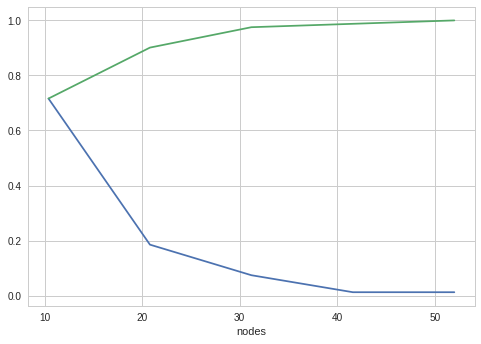

In [0]:
#for age
counts,bin_edges=np.histogram(hab_not['age'],bins=5,density=True)
pdf=counts/(sum(counts))
print('PDF: ',pdf)
print(bin_edges)
#for cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.show()


#for nodes
counts,bin_edges=np.histogram(hab_not['nodes'],bins=5,density=True)
pdf=counts/(sum(counts))
print('PDF: ',pdf)
print(bin_edges)
#for cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('nodes')
plt.show()

**Observations**
* Most of people died between age 50-55
* About 90 percent of people who died have nodes below 20

**Box Plots and Violin Plots**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


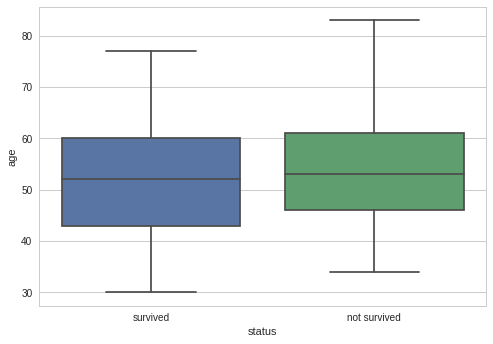

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


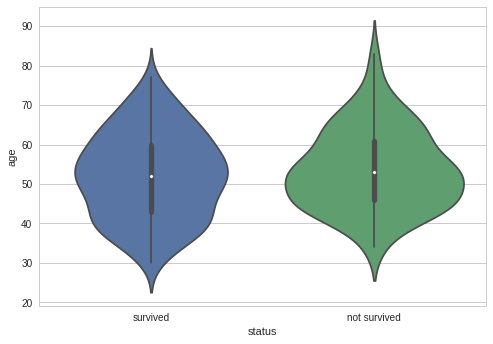

In [0]:
#age
sns.boxplot(x='status',y='age', data=hab)
plt.show()

#violin  plot
sns.violinplot(x="status", y="age", data=hab, size=8)
plt.show()

**Observations**
* People with age below 40 have better chances of survival

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


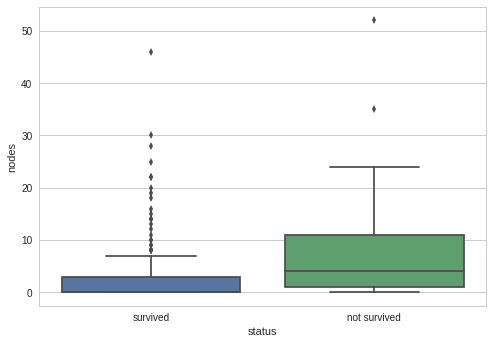

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


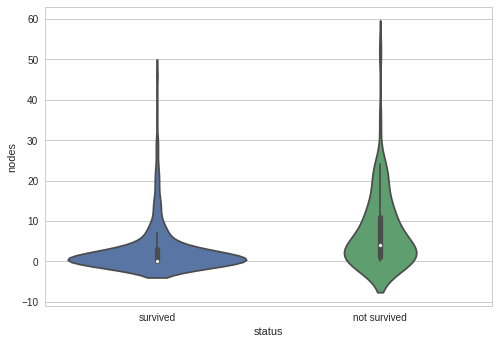

In [0]:
#nodes
sns.boxplot(x='status',y='nodes', data=hab)
plt.show()

#violin  plot
sns.violinplot(x="status", y="nodes", data=hab, size=8)
plt.show()

**Observations**
* People with number of nodes from 0-3 have a better chance of survival.

# Final Conclusions

* Number of nodes is the most important factor to decide survival status.
* The order is **nodes>age**. Year has the least impact.
* Most of the people with 0-2 nodes have survived (about 90 percent of people with 0-2 nodes) the number of people survived decreased after that range.
* Most of the people with age 30-40 have survived (about 90 percent of people aged 30-40) the number of people died increased after that range.